In [64]:
import csv
import pandas as pd
from matplotlib import pyplot as plt

#### ASSISTments-2009 Raw dataset
---

In [101]:
df_2009 = pd.read_csv('../data/raw_data/full_dataset_2009_corrected.csv',encoding='ISO-8859-1')
df_2009

/var/folders/3w/8x00rrfn2973f28r3bz1j6gr0000gn/T/ipykernel_14539/678664394.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2009 = pd.read_csv('../data/raw_data/full_dataset_2009_corrected.csv',encoding='ISO-8859-1')


,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32454,tutor,...,0,3,32454,30799,NaN,26,0,NaN,1,1.0
1,33022709,277618,64525,33150,51435,1,1,1,4922,tutor,...,0,3,4922,30799,NaN,55,0,NaN,2,2.0
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,...,0,3,42000,30799,NaN,88,0,NaN,1,1.0
3,35450295,220674,70363,33110,51395,1,1,1,4859,tutor,...,0,3,4859,30059,NaN,41,0,NaN,2,2.0
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,...,3,4,124564,30060,NaN,65,0,0.0,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401751,38214014,291495,96299,57830,108976,0,1,1,38234,tutor,...,0,2,38234,55692,200260.0,NaN,0,NaN,54,NaN
401752,38214016,291495,96299,57843,109015,0,1,1,6500,tutor,...,0,0,6500,55693,200299.0,NaN,0,NaN,55,NaN
401753,38214195,291503,96299,34577,54060,0,1,1,18344,tutor,...,0,3,18344,30677,NaN,0.8,0,NaN,56,NaN
401754,38214196,291503,96299,34577,54061,0,1,1,12922,tutor,...,0,2,12922,30677,NaN,-6,0,NaN,57,NaN


##### 2009-'response_time'

In [102]:
df_2009['ms_first_response'] = df_2009['ms_first_response']/1000
df_2009['ms_first_response'].describe()

count    401756.000000
mean         47.484643
std         361.458961
min       -7759.575000
25%           8.518000
50%          19.453000
75%          44.578250
max       84076.920000
Name: ms_first_response, dtype: float64

In [103]:
#df_2009 = df_2009.drop(df_2009[df_2009.ms_first_response < 1].index)
#df_2009 = df_2009.drop(df_2009[df_2009.ms_first_response > 10000].index)

df_2009['ms_first_response'].mask(df_2009['ms_first_response'] < 1, 1,inplace=True)
df_2009['ms_first_response'].mask(df_2009['ms_first_response'] > 10000, df_2009['ms_first_response'].mean(),inplace=True)

In [104]:
df_2009['ms_first_response'].describe()

count    401756.000000
mean         44.510800
std         143.767352
min           1.000000
25%           8.518000
50%          19.453000
75%          44.578250
max        9901.192000
Name: ms_first_response, dtype: float64

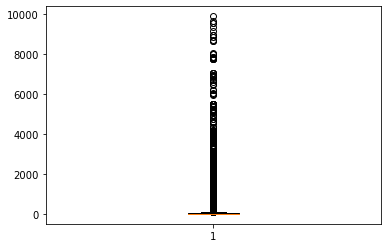

In [105]:
plt.boxplot(df_2009['ms_first_response'])
plt.show()

In [106]:
ids = df_2009.user_id.unique().tolist()  # 获得去重后的ids

In [107]:
skill_map = {}  # 设置空字典
for index, s in enumerate(df_2009.skill_id.unique().tolist()):  # 对 skill 去重 并进行带下标的遍历
    skill_map[s] = index  # 将值和下标添加到字典
skill_map  # 更新后的字典

{1.0: 0,
 2.0: 1,
 4.0: 2,
 5.0: 3,
 8.0: 4,
 9.0: 5,
 10.0: 6,
 11.0: 7,
 12.0: 8,
 13.0: 9,
 14.0: 10,
 15.0: 11,
 16.0: 12,
 17.0: 13,
 18.0: 14,
 21.0: 15,
 22.0: 16,
 24.0: 17,
 25.0: 18,
 26.0: 19,
 27.0: 20,
 32.0: 21,
 34.0: 22,
 35.0: 23,
 37.0: 24,
 39.0: 25,
 40.0: 26,
 42.0: 27,
 43.0: 28,
 46.0: 29,
 47.0: 30,
 48.0: 31,
 49.0: 32,
 50.0: 33,
 51.0: 34,
 53.0: 35,
 54.0: 36,
 58.0: 37,
 61.0: 38,
 63.0: 39,
 64.0: 40,
 65.0: 41,
 67.0: 42,
 69.0: 43,
 70.0: 44,
 74.0: 45,
 75.0: 46,
 76.0: 47,
 77.0: 48,
 79.0: 49,
 80.0: 50,
 81.0: 51,
 82.0: 52,
 83.0: 53,
 84.0: 54,
 85.0: 55,
 86.0: 56,
 91.0: 57,
 92.0: 58,
 94.0: 59,
 96.0: 60,
 97.0: 61,
 99.0: 62,
 101.0: 63,
 102.0: 64,
 104.0: 65,
 105.0: 66,
 110.0: 67,
 163.0: 68,
 165.0: 69,
 166.0: 70,
 173.0: 71,
 190.0: 72,
 193.0: 73,
 203.0: 74,
 204.0: 75,
 217.0: 76,
 221.0: 77,
 276.0: 78,
 277.0: 79,
 278.0: 80,
 279.0: 81,
 280.0: 82,
 290.0: 83,
 292.0: 84,
 293.0: 85,
 294.0: 86,
 295.0: 87,
 296.0: 88,
 297.0: 89,

In [108]:
df_2009

,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32.454,tutor,...,0,3,32454,30799,NaN,26,0,NaN,1,1.0
1,33022709,277618,64525,33150,51435,1,1,1,4.922,tutor,...,0,3,4922,30799,NaN,55,0,NaN,2,2.0
2,35450204,220674,70363,33159,51444,1,0,2,25.390,tutor,...,0,3,42000,30799,NaN,88,0,NaN,1,1.0
3,35450295,220674,70363,33110,51395,1,1,1,4.859,tutor,...,0,3,4859,30059,NaN,41,0,NaN,2,2.0
4,35450311,220674,70363,33196,51481,1,0,14,19.813,tutor,...,3,4,124564,30060,NaN,65,0,0.0,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401751,38214014,291495,96299,57830,108976,0,1,1,38.234,tutor,...,0,2,38234,55692,200260.0,NaN,0,NaN,54,NaN
401752,38214016,291495,96299,57843,109015,0,1,1,6.500,tutor,...,0,0,6500,55693,200299.0,NaN,0,NaN,55,NaN
401753,38214195,291503,96299,34577,54060,0,1,1,18.344,tutor,...,0,3,18344,30677,NaN,0.8,0,NaN,56,NaN
401754,38214196,291503,96299,34577,54061,0,1,1,12.922,tutor,...,0,2,12922,30677,NaN,-6,0,NaN,57,NaN


In [109]:
df_2009['attempt_count'].describe()

count    401756.000000
mean          1.596417
std          12.050437
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        3824.000000
Name: attempt_count, dtype: float64

In [110]:
for id in ids:  # 遍历所有id
    id_count = str(df_2009.query(f'user_id=={id}').shape[0])  # 获得该id的个数
    id_skill = df_2009.query(f'user_id=={id}').skill_id.map(skill_map).astype(
        str).to_list()  # 通过当前id进行筛选,并通过刚才的字典做映射,转换为str,转换为列表
    id_correct = df_2009.query(f'user_id=={id}').correct.astype(
        str).to_list()  # 通过当前id进行筛选,转换为str,转换为列表
    id_timeTaken = df_2009.query(f'user_id=={id}').ms_first_response.astype(
        int).astype(str).to_list()  # 通过当前id进行筛选,转换为整数,转换为str,转换为列表
    id_attempt = df_2009.query(f'user_id=={id}').attempt_count.astype(int).astype(str).to_list()
    id_hint = df_2009.query(f'user_id=={id}').first_action.astype(int).astype(str).to_list()
    id_hint_count =  df_2009.query(f'user_id=={id}').hint_count.astype(int).astype(str).to_list()
    with open('full_features_2009_data.csv', 'a') as f:  # 新建 txt 文档
        f.write(id_count+'\n')  # 写入 学生做题的数量
        f.write(','.join(id_skill)+'\n')  # 写入 对应的映射数字
        f.write(','.join(id_correct)+'\n')  # 写入对错情况
        f.write(','.join(id_timeTaken)+'\n')  # 写入 持续时间

        f.write(','.join(id_attempt)+'\n') # write the attempt count
        f.write(','.join(id_hint)+'\n') #hint or attempt
        f.write(','.join(id_hint_count)+'\n')# id_hint count

In [111]:
df_2009_feature = pd.read_table('../dataloader/full_features_2009_data.csv',header=None)
df_2009_feature

,0
0,800
1,"0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,3,4,4,..."
2,"1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
3,"32,4,45,21,28,57,39,15,17,163,17,30,11,67,74,4..."
4,"1,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
...,...
29514,"0,1,1,1,1,0,1,0"
29515,"30,295,90,118,67,30,23,2"
29516,"0,1,1,1,1,1,1,1"
29517,"2,0,0,0,0,0,0,1"


###### 2009 dataset split

In [112]:
path = 'full_features_2009_data.csv'
df_2009_split = pd.read_table(path,low_memory=False,header=None)
df_2009_split

,0
0,800
1,"0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,3,4,4,..."
2,"1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
3,"32,4,45,21,28,57,39,15,17,163,17,30,11,67,74,4..."
4,"1,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
...,...
29514,"0,1,1,1,1,0,1,0"
29515,"30,295,90,118,67,30,23,2"
29516,"0,1,1,1,1,1,1,1"
29517,"2,0,0,0,0,0,0,1"


In [113]:
df_2009_train = df_2009_split.iloc[0:20664,:]
df_2009_train

,0
0,800
1,"0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,3,4,4,..."
2,"1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
3,"32,4,45,21,28,57,39,15,17,163,17,30,11,67,74,4..."
4,"1,1,1,1,1,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
...,...
20659,"1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,..."
20660,"10,3,9,10,10,9,3,3,10,41,117,66,22,42,4,60,9,6..."
20661,"1,1,1,1,1,1,1,1,1,3,1,2,1,3,0,0,0,1,0,1,0,1,1,..."
20662,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,2,0,2,0,0,..."


In [114]:
df_2009_train.to_csv('assist_2009_train_time.csv',index=None,sep='|',quoting=csv.QUOTE_NONE,header=False)

In [115]:
df_2009_test = df_2009_split.iloc[20664:,]
df_2009_test

,0
20664,36
20665,"37,45,45,55,55,55,55,55,68,68,68,68,79,79,80,8..."
20666,"1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,1,..."
20667,"14,10,5,10,5,8,4,14,102,39,49,50,50,124,21,113..."
20668,"1,1,1,1,1,1,1,1,6,4,14,4,6,1,1,1,1,1,1,1,1,2,1..."
...,...
29514,"0,1,1,1,1,0,1,0"
29515,"30,295,90,118,67,30,23,2"
29516,"0,1,1,1,1,1,1,1"
29517,"2,0,0,0,0,0,0,1"


In [116]:
df_2009_test.to_csv('assist_2009_test_time.csv',index=None,sep='|',quoting=csv.QUOTE_NONE,header=False)

#### ASSISTments-2017 Raw dataset
---

In [28]:
import csv
import pandas as pd
from matplotlib import pyplot as plt

In [31]:
df_2017 = pd.read_csv('../data/raw_data/anonymized_full_release_competition_dataset.csv')
df_2017

/var/folders/3w/8x00rrfn2973f28r3bz1j6gr0000gn/T/ipykernel_14539/2957497471.py:1: DtypeWarning: Columns (76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2017 = pd.read_csv('../data/raw_data/anonymized_full_release_competition_dataset.csv')


,studentId,MiddleSchoolId,InferredGender,SY ASSISTments Usage,AveKnow,AveCarelessness,AveCorrect,NumActions,AveResBored,AveResEngcon,...,RES_CONFUSED,RES_FRUSTRATED,RES_OFFTASK,RES_GAMING,Ln-1,Ln,MCAS,Enrolled,Selective,isSTEM
0,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.000000,0.000000,0.785585,0.000264,0.13,0.06119,45,0,0,NaN
1,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.887452,0.000000,0.468252,0.001483,0.06119,0.21351,45,0,0,NaN
2,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.887452,0.000000,0.468252,0.001483,0.116,0.033306,45,0,0,NaN
3,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.000000,0.000000,0.108417,0.010665,0.116,0.033306,45,0,0,NaN
4,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.000000,0.000000,0.108417,0.010665,0.033306,0.118386,45,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942811,7783,1,NaN,2005-2006,0.210902,0.094888,0.456522,276,0.271812,0.611678,...,0.000000,0.000000,0.122595,0.000092,0.054517,0.053783,28,1,0,NaN
942812,7783,1,NaN,2005-2006,0.210902,0.094888,0.456522,276,0.271812,0.611678,...,0.633474,0.000000,0.122595,0.002815,0.053783,0.053673,28,1,0,NaN
942813,7783,1,NaN,2005-2006,0.210902,0.094888,0.456522,276,0.271812,0.611678,...,0.000000,0.000000,0.122595,0.101184,0.053783,0.053673,28,1,0,NaN
942814,7783,1,NaN,2005-2006,0.210902,0.094888,0.456522,276,0.271812,0.611678,...,0.000000,0.000000,0.122595,0.101184,0.053783,0.053673,28,1,0,NaN


In [32]:
df_2017.loc[:,['studentId','correct','AveResBored','AveResEngcon','AveResConf','AveResFrust','AveResOfftask','AveResGaming']]

,studentId,correct,AveResBored,AveResEngcon,AveResConf,AveResFrust,AveResOfftask,AveResGaming
0,8,0,0.208389,0.679126,0.115905,0.112408,0.156503,0.196561
1,8,1,0.208389,0.679126,0.115905,0.112408,0.156503,0.196561
2,8,0,0.208389,0.679126,0.115905,0.112408,0.156503,0.196561
3,8,0,0.208389,0.679126,0.115905,0.112408,0.156503,0.196561
4,8,1,0.208389,0.679126,0.115905,0.112408,0.156503,0.196561
...,...,...,...,...,...,...,...,...
942811,7783,1,0.271812,0.611678,0.123615,0.137851,0.287965,0.138583
942812,7783,0,0.271812,0.611678,0.123615,0.137851,0.287965,0.138583
942813,7783,0,0.271812,0.611678,0.123615,0.137851,0.287965,0.138583
942814,7783,1,0.271812,0.611678,0.123615,0.137851,0.287965,0.138583


In [33]:
df_2017[''].describe()

count    942816.000000
mean          0.232949
std           0.030637
min           0.170871
25%           0.209035
50%           0.230394
75%           0.252082
max           0.440870
Name: AveResBored, dtype: float64

In [46]:
df_2017['AveResBored'] = df_2017['AveResBored']*100
df_2017['AveResEngcon'] = df_2017['AveResEngcon'] *100
df_2017['AveResConf'] = df_2017['AveResConf'] *100
df_2017['AveResFrust'] = df_2017['AveResFrust'] * 100
df_2017['AveResOfftask'] = df_2017['AveResOfftask'] * 100
df_2017['AveResGaming'] = df_2017['AveResGaming'] * 100

In [47]:
df_2017.loc[:,['studentId','correct','AveResBored','AveResEngcon','AveResConf','AveResFrust','AveResOfftask','AveResGaming']]

,studentId,correct,AveResBored,AveResEngcon,AveResConf,AveResFrust,AveResOfftask,AveResGaming
0,8,0,20.838904,67.912589,11.590539,11.240808,15.650305,19.656100
1,8,1,20.838904,67.912589,11.590539,11.240808,15.650305,19.656100
2,8,0,20.838904,67.912589,11.590539,11.240808,15.650305,19.656100
3,8,0,20.838904,67.912589,11.590539,11.240808,15.650305,19.656100
4,8,1,20.838904,67.912589,11.590539,11.240808,15.650305,19.656100
...,...,...,...,...,...,...,...,...
942811,7783,1,27.181150,61.167791,12.361459,13.785129,28.796540,13.858344
942812,7783,0,27.181150,61.167791,12.361459,13.785129,28.796540,13.858344
942813,7783,0,27.181150,61.167791,12.361459,13.785129,28.796540,13.858344
942814,7783,1,27.181150,61.167791,12.361459,13.785129,28.796540,13.858344


In [50]:
df_2017['AveResEngcon'].describe()

count    942816.000000
mean         65.844153
std           2.744015
min          40.330939
25%          64.206017
50%          66.066901
75%          67.658808
max          72.399032
Name: AveResEngcon, dtype: float64

In [33]:
df_2017['attemptCount'].describe()

count    942816.000000
mean          2.673605
std           2.929801
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          91.000000
Name: attemptCount, dtype: float64

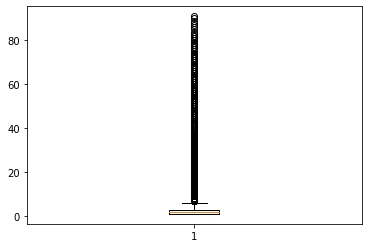

In [7]:
plt.boxplot(df_2017['attemptCount'])
plt.show()

In [56]:
df_2017['hintTotal']

0         1
1         0
2         0
3         0
4         1
         ..
942811    3
942812    0
942813    0
942814    0
942815    0
Name: hintTotal, Length: 942816, dtype: int64

In [8]:
df_2017['hintTotal'].describe()

count    942816.000000
mean          1.953967
std           2.929242
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          56.000000
Name: hintTotal, dtype: float64

In [9]:
df_2017['hint'].describe()

count    942816.000000
mean          0.331025
std           0.470582
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: hint, dtype: float64

In [10]:
df_2017['timeTaken'].describe()

count    942816.000000
mean         29.747869
std          72.019768
min           0.000000
25%           5.000000
50%          11.000000
75%          30.000000
max        9999.000000
Name: timeTaken, dtype: float64

In [11]:
df_2017 = df_2017.drop(df_2017[df_2017['timeTaken'] < 1].index)
df_2017 = df_2017.drop(df_2017[df_2017['timeTaken'] > 4000].index)

In [12]:
df_2017['timeTaken'].describe()

count    918106.000000
mean         30.429460
std          65.796218
min           1.000000
25%           5.000000
50%          12.000000
75%          31.000000
max        3925.000000
Name: timeTaken, dtype: float64

In [13]:
df_2017

,studentId,MiddleSchoolId,InferredGender,SY ASSISTments Usage,AveKnow,AveCarelessness,AveCorrect,NumActions,AveResBored,AveResEngcon,...,RES_CONFUSED,RES_FRUSTRATED,RES_OFFTASK,RES_GAMING,Ln-1,Ln,MCAS,Enrolled,Selective,isSTEM
0,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.000000,0.000000,0.785585,0.000264,0.13,0.06119,45,0,0,NaN
1,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.887452,0.000000,0.468252,0.001483,0.06119,0.21351,45,0,0,NaN
2,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.887452,0.000000,0.468252,0.001483,0.116,0.033306,45,0,0,NaN
3,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.000000,0.000000,0.108417,0.010665,0.116,0.033306,45,0,0,NaN
4,8,2,Male,2004-2005,0.352416,0.183276,0.483902,1056,0.208389,0.679126,...,0.000000,0.000000,0.108417,0.010665,0.033306,0.118386,45,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942811,7783,1,NaN,2005-2006,0.210902,0.094888,0.456522,276,0.271812,0.611678,...,0.000000,0.000000,0.122595,0.000092,0.054517,0.053783,28,1,0,NaN
942812,7783,1,NaN,2005-2006,0.210902,0.094888,0.456522,276,0.271812,0.611678,...,0.633474,0.000000,0.122595,0.002815,0.053783,0.053673,28,1,0,NaN
942813,7783,1,NaN,2005-2006,0.210902,0.094888,0.456522,276,0.271812,0.611678,...,0.000000,0.000000,0.122595,0.101184,0.053783,0.053673,28,1,0,NaN
942814,7783,1,NaN,2005-2006,0.210902,0.094888,0.456522,276,0.271812,0.611678,...,0.000000,0.000000,0.122595,0.101184,0.053783,0.053673,28,1,0,NaN


In [14]:
ids = df_2017.studentId.unique().tolist()  # 获得去重后的ids
ids

[8,
 35,
 39,
 64,
 77,
 126,
 134,
 156,
 160,
 164,
 205,
 215,
 243,
 255,
 261,
 283,
 285,
 291,
 299,
 337,
 344,
 349,
 360,
 372,
 383,
 391,
 401,
 404,
 410,
 418,
 447,
 473,
 474,
 475,
 476,
 492,
 496,
 512,
 530,
 532,
 542,
 546,
 566,
 568,
 603,
 609,
 616,
 621,
 631,
 633,
 636,
 654,
 663,
 667,
 672,
 676,
 683,
 684,
 696,
 709,
 743,
 752,
 781,
 782,
 789,
 808,
 809,
 810,
 824,
 826,
 828,
 832,
 834,
 837,
 842,
 843,
 848,
 868,
 898,
 937,
 954,
 968,
 969,
 998,
 1007,
 1016,
 1020,
 1044,
 1046,
 1047,
 1055,
 1079,
 1107,
 1108,
 1110,
 1178,
 1202,
 1208,
 1232,
 1237,
 1238,
 1240,
 1250,
 1287,
 1294,
 1305,
 1313,
 1317,
 1337,
 1338,
 1348,
 1362,
 1375,
 1380,
 1394,
 1404,
 1408,
 1417,
 1437,
 1438,
 1439,
 1450,
 1462,
 1483,
 1527,
 1548,
 1553,
 1567,
 1572,
 1574,
 1576,
 1583,
 1586,
 1599,
 1607,
 1649,
 1657,
 1660,
 1667,
 1668,
 1726,
 1735,
 1751,
 1764,
 1776,
 1779,
 1800,
 1813,
 1821,
 1825,
 1849,
 1857,
 1858,
 1905,
 1922,
 1925

In [15]:
skill_map = {}  # 设置空字典
for index, s in enumerate(df_2017.skill.unique().tolist()):  # 对 skill 去重 并进行带下标的遍历
    skill_map[s] = index  # 将值和下标添加到字典
skill_map  # 更新后的字典

{'properties-of-geometric-figures': 0,
 'sum-of-interior-angles-more-than-3-sides': 1,
 'point-plotting': 2,
 'transformations-rotations': 3,
 'reading-graph': 4,
 'area': 5,
 'perimeter': 6,
 'square-root': 7,
 'isosceles-triangle': 8,
 'application: isosceles triangle': 9,
 'multiplying-decimals': 10,
 'proportion': 11,
 'pythagorean-theorem': 12,
 'interpreting-linear-equations': 13,
 'pattern-finding': 14,
 'application: compare points': 15,
 'application: multi-column subtraction': 16,
 'application: simple multiplication': 17,
 'application: compare expressions': 18,
 'application: order of operations': 19,
 'application: multi-column addition': 20,
 'noskill': 21,
 'application: read points': 22,
 'application: find slope in graph': 23,
 'p-patterns-relations-algebra': 24,
 'percent-of': 25,
 'venn-diagram': 26,
 'equivalent-fractions-decimals-percents': 27,
 'of-means-multiply': 28,
 'fraction-multiplication': 29,
 'supplementary-angles': 30,
 'transversals': 31,
 'triangle-ine

In [16]:
for id in ids:  # 遍历所有id
    id_count = str(df_2017.query(f'studentId=={id}').shape[0])  # 获得该id的个数
    id_skill = df_2017.query(f'studentId=={id}').skill.map(skill_map).astype(
        str).to_list()  # 通过当前id进行筛选,并通过刚才的字典做映射,转换为str,转换为列表
    id_correct = df_2017.query(f'studentId=={id}').correct.astype(
        str).to_list()  # 通过当前id进行筛选,转换为str,转换为列表
    id_timeTaken = df_2017.query(f'studentId=={id}').timeTaken.astype(
        int).astype(str).to_list()  # 通过当前id进行筛选,转换为整数,转换为str,转换为列表
    id_attemptcount = df_2017.query(f'studentId=={id}').attemptCount.astype(int).astype(str).to_list()
    id_hint = df_2017.query(f'studentId=={id}').hint.astype(int).astype(str).to_list()
    id_hintcount = df_2017.query(f'studentId=={id}').hintTotal.astype(int).astype(str).to_list()
    with open('features_2017_data.csv', 'a') as f:  # 新建 txt 文档
        f.write(id_count+'\n')  # 写入 学生做题的数量
        f.write(','.join(id_skill)+'\n')  # 写入 对应的映射数字
        f.write(','.join(id_correct)+'\n')  # 写入对错情况
        f.write(','.join(id_timeTaken)+'\n')  # 写入 持续时间

        f.write(','.join(id_attemptcount)+'\n')  # 写入 尝试次数
        f.write(','.join(id_hint)+'\n')  # 写入 提示选择
        f.write(','.join(id_hintcount)+'\n')  # 写入 提示次数

In [51]:
path = 'features_2017_data.csv'
df_2017_split = pd.read_table(path,header=None)
df_2017_split

,0
0,1018
1,"0,0,1,1,1,1,1,2,3,3,3,2,2,2,2,4,5,5,5,6,6,5,5,..."
2,"0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0,1,..."
3,"49,3,6,17,1,59,15,61,17,14,8,28,51,29,4,83,50,..."
4,"1,1,1,2,1,2,3,1,1,3,1,1,2,1,2,1,1,1,2,1,1,1,1,..."
...,...
11958,"0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,..."
11959,"653,4,35,145,73,9,102,11,10,8,365,159,33,29,74..."
11960,"1,2,3,4,1,2,1,2,3,4,1,1,1,1,1,1,1,1,2,3,4,5,1,..."
11961,"0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,..."


In [52]:
train = df_2017_split.iloc[0:5860,:]
train.to_csv('assist_2017_train_time.csv',index=None,sep='|',quoting=csv.QUOTE_NONE,header=False)

In [53]:
test = df_2017_split.iloc[5860:,]
test.to_csv('assist_2017_test_time.csv',index=None,sep='|',quoting=csv.QUOTE_NONE,header=False)